<div style="border:solid blue 2px; padding: 20px">
<b>Привет, Евгения!👋</b>

Меня зовут Арсений, и я буду ревьюером твоего проекта. Если не против, то давай общаться на «ты» :) Но мы легко можем перейти на «вы», если тебе так будет комфортнее. 

Моя основная цель — помочь тебе стать крутым специалистом, поэтому давай разберем твой проект и попробуем сделать его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но исправлять их необязательно. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю то, что сделано отлично. </div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Если нужно удалить часть кода или целую ячейку, то лучше просто закомментируй.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так. </div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отличное содержание и вступление. </div>

## Загрузка и подготовка данных

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

from scipy import stats as st

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Здорово, что все импорты находятся в одной ячейке. Но, чтобы сделать ещё лучше, приведу рекомендации по стандартам PEP-8.<br>
    
Импорты могут быть сгруппированы в следующем порядке:

1.импорты из стандартной библиотеки
    
2.импорты сторонних библиотек
    
3.импорты модулей текущего проекта

Можно вставить пустую строку между каждой группой импортов.

В каждой группе желательно отсортировать импорты в алфавитном порядке.

Ccылка для ознакомления: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html</div>

Загрузка данных

In [2]:
try:
    df0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    df0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
df0.head(5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
try:
    df1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    df1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
df1.head(5)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [4]:
try:
    df2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')
df2.head(5)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Функция для:

    - размер датасета
    - поиск отсутствующих значений
    - поиск явных дубликатов
    - графики распределения признаков

In [5]:
def dfs(df):
    print(df.info())
    print('\n\nДубликаты:', df.duplicated().sum())
    print('\n\nРаспределение признаков')
    df[['f0','f1','f2', 'product']].hist()
    plt.show()
    plt.figure(figsize = (7, 4));
    plt.title('Корреляция признаков', fontsize = 15)
    sns.heatmap(df.corr(), annot = True, cmap="crest");

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


Дубликаты: 0


Распределение признаков


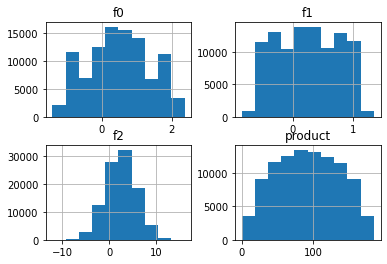

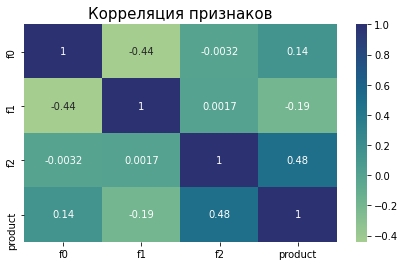

In [6]:
dfs(df0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


Дубликаты: 0


Распределение признаков


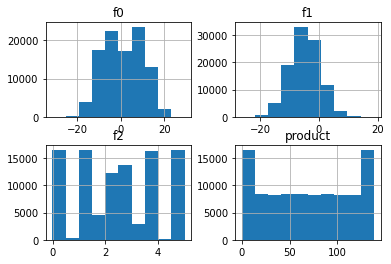

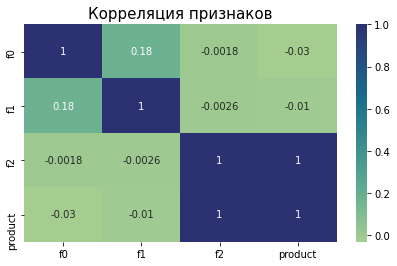

In [7]:
dfs(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


Дубликаты: 0


Распределение признаков


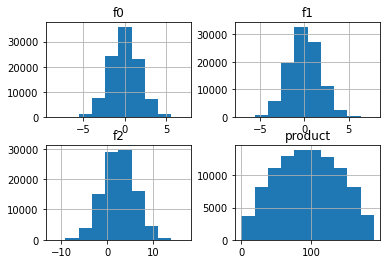

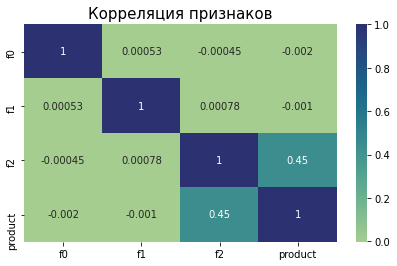

In [8]:
dfs(df2)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Данные загружены корректно, здорово, что используешь try-except. Круто, что анализ данных и неторый код далее выполняется с помощью функций, так ты избегаешь дублирования кода. Отличные графики.</div>

Удалим ненужный столбец с ID

In [9]:
df0=df0.drop(columns=['id'])
df0.columns

Index(['f0', 'f1', 'f2', 'product'], dtype='object')

In [10]:
df1=df1.drop(columns=['id'])
df1.columns

Index(['f0', 'f1', 'f2', 'product'], dtype='object')

In [11]:
df2=df2.drop(columns=['id'])
df2.columns

Index(['f0', 'f1', 'f2', 'product'], dtype='object')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, этот признак нам действительно не понадобится.</div>

<div class="paragraph">Данные геологоразведки трёх регионов:</div>
<div class="paragraph"><code class="code-inline code-inline_theme_light"></code></div>
<div class="paragraph">Признаки</div>
<ul>
<li class="paragraph"><code class="code-inline code-inline_theme_light"></code><em>id</em> &mdash; уникальный идентификатор скважины;</li>
<li><em>f0, f1, f2</em> &mdash; три признака точек (неважно, что они означают, но сами признаки значимы);</li>
</ul>
<p>Целевой признак</p>
<ul>
<li><em>product</em> &mdash; объём запасов в скважине (тыс. баррелей).</li>
</ul>


Данные в трех таблицах содержат по 100000 строк и 5 столбцов

Дубликаты и пропущенные значения не обнаружены

Удален ненужный столбец с ID

В регионах 0 и 1 на графиках заметны выбросы, показатели по региону 2 имеют нормальное распределение.

По 1 региону прослеживается сильная корреляция между признаком F2 и целевым признаком.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хороший вывод.</div>

## Обучение и проверка модели

Напишем функцию для:

    - разделения на тестовую и валидационную выборки
    - масштабирования данных
    - обучение модели
    - RMSE и предсказание

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Ты скорее всего вместо тестовой хотела написать обучающую) </div>

In [12]:
def tt_split(df):
    features = df.drop(['product',], axis=1)
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size=0.25, 
                                                                                  random_state=12345)
    
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)

    #model = LinearRegression(normalize=False)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    predictions = pd.Series(predictions_valid)
    rmse = (mean_squared_error(target_valid, predictions))**(0.5)
    product_mean = sum(predictions) / len(predictions)
    print('RMSE', rmse)
    print('Cредний запас предсказанного сырья', product_mean)
    
    return (predictions, target_valid.reset_index(drop=True), rmse)
    

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Здорово, что ты не забыла избавиться от несоответсвия индексов. Иначе бы далее возникли ошибки в расчетах. </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Код падает с ошибкой, потому что у LinearRegression нет параметра normalize. </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Для mean_squared_error аргументы должны идти в таком порядке: y_true, y_pred. А у тебя наоборот. Исправь это, пожалуйста,. </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправлено. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2 ✔️:</b> Оба комментария учтены. </div>

In [13]:
#tt_split(df0)

In [14]:
#tt_split(df1)

In [15]:
#tt_split(df2)

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Можно было сразу сделеть как в ячейке ниже. </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправлено. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2 ✔️:</b> Супер! </div>

Сохраним предсказания модели и реальные ответы, RMSE

In [16]:
predictions0, valid0, rmse0 = tt_split(df0)
predictions1, valid1, rmse1 = tt_split(df1)
predictions2, valid2, rmse2 = tt_split(df2)

RMSE 37.5794217150813
Cредний запас предсказанного сырья 92.59256778438008
RMSE 0.893099286775617
Cредний запас предсказанного сырья 68.7285468954458
RMSE 40.02970873393434
Cредний запас предсказанного сырья 94.96504596800506


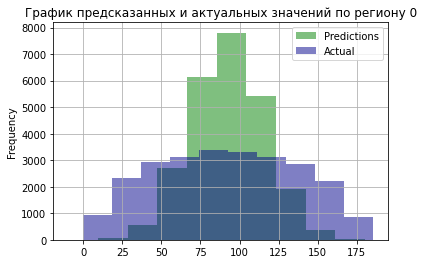

In [17]:
plt.title('График предсказанных и актуальных значений по региону 0')
ax=predictions0.plot(kind='hist', grid=True, legend=True, alpha=0.5, label='Predictions', color = 'green')
ax1=valid0.plot(kind='hist',grid=True, legend=True, alpha=0.5, label='Actual', color = 'darkblue', ax=ax)
plt.show()

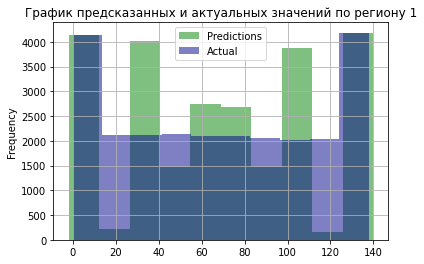

In [18]:
plt.title('График предсказанных и актуальных значений по региону 1')
ax=predictions1.plot(kind='hist', grid=True, legend=True, alpha=0.5, label='Predictions', color = 'green')
ax1=valid1.plot(kind='hist',grid=True, legend=True, alpha=0.5, label='Actual', color = 'darkblue', ax=ax)
plt.show()

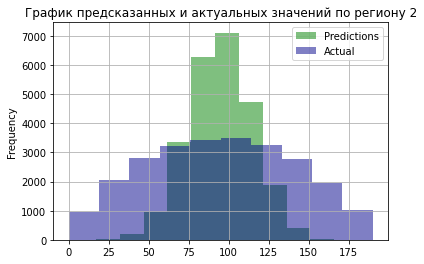

In [19]:
plt.title('График предсказанных и актуальных значений по региону 2')
ax=predictions2.plot(kind='hist', grid=True, legend=True, alpha=0.5, label='Predictions', color = 'green')
ax1=valid2.plot(kind='hist',grid=True, legend=True, alpha=0.5, label='Actual', color = 'darkblue', ax=ax)
plt.show()

В результате обучения моделей по региону 0 и 2 среднеквадратичная ошибка довольно большая, предсказания сильно отличаются от реальных данных. У первого региона модель показала себя лучше всего, что ожидаемо, в связи с сильной корреляцией признака F2 с целевым признаком.

0 регион

RMSE 37.5794217150813
Cредний запас предсказанного сырья 92.59256778438008

1 регион

RMSE 0.893099286775617
Cредний запас предсказанного сырья 68.7285468954458

2 регион

RMSE 40.02970873393434
Cредний запас предсказанного сырья 94.96504596800506

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Все сделано правильно, отличный вывод.  </div>

## Подготовка к расчёту прибыли

Сохраним все ключевые значения для расчётов в отдельных переменных

In [20]:
budget = 10000000000
points = 500
best_points = 200
barrels_price = 450000
loss_prob = 0.25

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Следуя стилистическим канонам PEP 8, константы рекомендую записывать в верхнем регистре. </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Учту, спасибо. </div>

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.

In [21]:
break_even = round(budget / (best_points * barrels_price), 2)
print('достаточный объём сырья для безубыточной разработки новой скважины:', break_even, 'баррелей')

достаточный объём сырья для безубыточной разработки новой скважины: 111.11 баррелей


Сравним полученный объём сырья со средним запасом в каждом регионе. 

In [22]:
print('доля объема сырья в регионе 0 от достаточного объема сырья для безубыточной разработки новой скважины', 
      round((df0['product'].mean()*100)/break_even, 2), '%')

доля объема сырья в регионе 0 от достаточного объема сырья для безубыточной разработки новой скважины 83.25 %


In [23]:
print('доля объема сырья в регионе 1 от достаточного объема сырья для безубыточной разработки новой скважины', 
      round((df1['product'].mean()*100)/break_even, 2), '%')

доля объема сырья в регионе 1 от достаточного объема сырья для безубыточной разработки новой скважины 61.94 %


In [24]:
print('доля объема сырья в регионе 2 от достаточного объема сырья для безубыточной разработки новой скважины', 
      round((df2['product'].mean()*100)/break_even, 2), '%')

доля объема сырья в регионе 2 от достаточного объема сырья для безубыточной разработки новой скважины 85.5 %


Средний запас сырья в скважинах по регионам ниже достаточного объема

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Расчеты верны, молодец! </div>

Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели:

Выберем 200 скважин с максимальными значениями предсказаний, просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям, рассчитаем прибыль для полученного объёма сырья.

In [25]:
#def profit(predictions, valid, best_points):
#    sort = pd.Series(predictions, index=valid.index).sort_values(ascending=False)
#    maxx = sort[:best_points].sum()
#    prof_pred=(maxx*barrels_price)-budget
#    print('Суммарный запас сырья в 200 лучших скважинах:', round(maxx,2), 'баррелей')
#    print('Прибыль для полученного объёма сырья:', round(prof_pred/1000,2), 'рублей')
#    print('Профицит составил:', round(maxx/best_points*100/break_even, 2), '%')

In [26]:
def profit(predictions, valid, best_points):
    pred = predictions.sort_values(ascending=False)
    top_valid = valid[pred.index][:best_points].sum()
    income = top_valid*barrels_price - budget
    print('Суммарный запас сырья в 200 лучших скважинах:', round(top_valid,2), 'баррелей')
    print('Прибыль для полученного объёма сырья:', round(income/1000,2), 'рублей')
    print('Профицит составил:', round(top_valid/best_points*100/break_even, 2), '%')

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Прибыль нужно считать для реальных значений скважин по индексам топ-200 из предсказаний. Как раз как ты это делаешь в profit_2. Тут тоже лучше сделать так. </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправлено. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2 ✔️:</b> Молодец, тут теперь все правильно. </div>

In [27]:
profit(predictions0, valid0, best_points)

Суммарный запас сырья в 200 лучших скважинах: 29601.84 баррелей
Прибыль для полученного объёма сырья: 3320826.04 рублей
Профицит составил: 133.21 %


In [28]:
profit(predictions1, valid1, best_points)

Суммарный запас сырья в 200 лучших скважинах: 27589.08 баррелей
Прибыль для полученного объёма сырья: 2415086.7 рублей
Профицит составил: 124.15 %


In [29]:
profit(predictions2, valid2, best_points)

Суммарный запас сырья в 200 лучших скважинах: 28245.22 баррелей
Прибыль для полученного объёма сырья: 2710349.96 рублей
Профицит составил: 127.1 %


При разработке 200 лучших скважин, все регионы показали хорошие результаты.

## Расчёт прибыли и рисков 

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков.

In [30]:
def profit_2(predictions, valid):
    pred = predictions.sort_values(ascending=False)
    top_valid = valid[pred.index][:best_points]
    income = top_valid.sum()*barrels_price
    return income-budget

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Алгоритм верный, но тут вместо значения 200 лучше использовать созданную ранее константу. Ведь если придется менять это значение, то будет достаточно поправить только в одном месте, а не искать его по всему проеку. </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправлено. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2 ✔️:</b> 👍 </div>

In [31]:
def bootstap(predictions, valid):
    state = np.random.RandomState(12345)
    income = []
    for i in tqdm(range(1000)):
        valid_sample = valid.sample(points, replace=True, random_state=state)
        predictions_sample = predictions[valid_sample.index]
        income.append(profit_2(predictions_sample, valid_sample))
    income = pd.Series(income)    
    confidence_interval = st.norm.interval(alpha=0.95, loc=income.mean(), scale=income.sem())
    mean_income = sum(income) / len(income)
    risk = st.percentileofscore(income, 0)

    return (confidence_interval, mean_income, risk)

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Тут есть один нюанс. Функция <code>st.t.interval</code> используется для небольшой выборки (n < 30), а в нашем случае наблюдений намного больше, значит мы можем предположить, что выборочное распределение выборочного среднего нормально распределено (благодаря центральной предельной теореме ). Поэтому лучше использовать <code>st.norm.interval</code> или же <code>pandas.DataFrame.quantile</code>, что еще проще. Исправь это, пожалуйста. </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправлено. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2 ✔️:</b> Отлично. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Тут еще есть одна интересная деталь, связанная с реализацией самого Bootstrap: в процессе может получиться, что выборка с реальными значениями для подсчёта прибыли получится большего размера, чем мы ожидаем. Например, не 200 скважин, а 206-208 значений, соответственно, риск будет при этом занижен, ведь прибыль мы считаем, учитывая расходы на разработку именно 200 скважин, меньшего числа. <br>
Рекомендация здесь: не бутстрапировать отдельно столбец с предсказаниями, а привязывать его при этом к столбцу с реальными значениями, например, бутстрапируя цельный DataFrame с предсказанными и реальными значениями.</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Не поняла, как сделать. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v2 ⚠️:</b> Просто реальные значения и предсказания объеденить в один датафрейм. У тебя получится 2 столбца. И вот уже семплировать их. </div>

In [32]:
confidence_interval, mean_income, risk = bootstap(predictions0, valid0)
print('Средняя прибыль:', round(mean_income,2), 'рублей')
print('95%-й доверительный интервал:', confidence_interval)
print('Риски:', round(risk,2), '%')

100%|██████████| 1000/1000 [00:01<00:00, 674.58it/s]

Средняя прибыль: 425938526.91 рублей
95%-й доверительный интервал: (408753053.4012523, 443124000.41993254)
Риски: 6.0 %


In [33]:
confidence_interval, mean_income, risk = bootstap(predictions1, valid1)
print('Средняя прибыль:', round(mean_income,2), 'рублей')
print('95%-й доверительный интервал:', confidence_interval)
print('Риски:', round(risk,2), '%')

100%|██████████| 1000/1000 [00:01<00:00, 684.64it/s]

Средняя прибыль: 515222773.44 рублей
95%-й доверительный интервал: (501637954.84047496, 528807592.0461048)
Риски: 1.0 %


In [34]:
confidence_interval, mean_income, risk = bootstap(predictions2, valid2)
print('Средняя прибыль:', round(mean_income,2), 'рублей')
print('95%-й доверительный интервал:', confidence_interval)
print('Риски:', round(risk,2), '%')

100%|██████████| 1000/1000 [00:01<00:00, 647.53it/s]

Средняя прибыль: 435008362.78 рублей
95%-й доверительный интервал: (417474820.58837974, 452541904.9771315)
Риски: 6.4 %


Регион 1 лучше всего подходит для разработки скважин:

Минимальные риски (1.0%) в сочетании с наибольшей средней прибылью (515222773.44 рублей)

## Вывод

<p>В проекте были предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны.</p>
<p>Необходимо было построить модель для определения региона, где добыча принесёт наибольшую прибыль, проанализировать возможную прибыль и риски техникой <em>Bootstrap.</em></p>
<p>В ходе работы были построены три модели регрессии для трех регионов, в результате обучения моделей по регионам 0 и 2 среднеквадратичная ошибка довольно большая, предсказания сильно отличаются от реальных данных. У первого региона модель показала себя лучше всего, что ожидаемо, в связи с сильной корреляцией признака F2 с целевым признаком.</p>
<p>0 регион</p>
<p>RMSE 37.5794217150813 Cредний запас предсказанного сырья 92.59256778438008</p>
<p>1 регион</p>
<p>RMSE 0.893099286775617 Cредний запас предсказанного сырья 68.7285468954458</p>
<p>2 регион</p>
<p>RMSE 40.02970873393434 Cредний запас предсказанного сырья 94.96504596800506</p>
<p>Был произведен рассчет прибыли и рисков, средний запас сырья в скважинах по регионам оказался ниже достаточного объема:</p>
<p>0 регион&nbsp;</p>
<p>Доля объема сырья в регионе от достаточного объема сырья для безубыточной разработки новой скважины составила 83.25 %</p>
<p>1 регион&nbsp;</p>
<p>Доля объема сырья в регионе от достаточного объема сырья для безубыточной разработки новой скважины составила 61.94 %</p>
<p>2 регион&nbsp;</p>
<p>Доля объема сырья в регионе от достаточного объема сырья для безубыточной разработки новой скважины составила 85.5 %</p>
<p>Однако, выбрав 200 скважин с максимальными значениями предсказаний, просуммировав целевое значение объёма сырья, соответствующее этим предсказаниям и рассчитав прибыль для полученного объёма сырья, выяснилось, что:</p>
<p>0 регион&nbsp;</p>
<p>Суммарный запас сырья в 200 лучших скважинах: 31102.33 баррелей<br />Прибыль для полученного объёма сырья: 3996048.88 рублей<br />Профицит составил: 139.96 %</p>
<p>1 регион</p>
<p>Суммарный запас сырья в 200 лучших скважинах: 27746.03 баррелей<br />Прибыль для полученного объёма сырья: 2485712.05 рублей<br />Профицит составил: 124.86 %</p>
<p>2 регион</p>
<p>Суммарный запас сырья в 200 лучших скважинах: 29603.9 баррелей<br />Прибыль для полученного объёма сырья: 3321754.4 рублей<br />Профицит составил: 133.22 %</p>
<p>&nbsp;</p>
<p>Применив технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли и найдя среднюю прибыль, 95%-й доверительный интервал и риск убытков, оказалось, что:</p>
<p>Регион 1 лучше всего подходит для разработки скважин, показав следующие значения:</p>
<ul>
<li>Средняя прибыль: 515222773.44 рублей</li>
<li>95%-й доверительный интервал: 501637954.84 - 528807592.04</li>
<li>Риски: 1.0 %</li>
</ul>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отличный вывод. Ты выбрала правильный регион! </div>

<div style="border:solid blue 2px; padding: 20px">
<b>Итоговый комментарий ревьюера</b>
<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b>
Мне очень понравилась твоя работа. Спасибо тебе большое, за хорошее оформление проекта.
Чувствуется уверенное знание материала и владение питоном в целом. 
</div>
<b>Но нужно кое-что поправить:</b>
<div class="alert alert-block alert-danger">
<ul>1) Запустить код без ошибок.</ul>
<ul>2) Поменять местами аргументы для mean_squared_error.</ul>
<ul>3) Использовать созданные константы.</ul>
<ul>4) Исправить расчет доверительного интервала.</ul>
</div>

<b>Осталось совсем немного, буду ждать твою работу на повторное ревью 🙂</b></div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо, все замечания исправлены, кроме одного: </div>
    
<div class="alert alert-warning">бутстрапируя цельный DataFrame с предсказанными и реальными значениями. </div>

<div style="border:solid blue 2px; padding: 20px">
<b>Итоговый комментарий ревьюера v2</b>
<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b>
Все недочеты исправлены. Проект принят, поздравляю🥳
</div>

<b>Желаю успехов и удачи!</b></div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован